In [1]:
print("pyton hello")

pyton hello


In [4]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
#importing data
data = pd.read_csv("petrol.csv")

In [6]:
print(data.head())

          shivam  Delhi  Kolkata  Mumbai  Chennai
0  April 19 2018  74.07    76.77   81.92    76.84
1  April 18 2018  74.02    76.73   81.87    76.79
2  April 17 2018  74.02    76.73   81.87    76.79
3  April 16 2018  74.02    76.73   81.87    76.79
4  April 15 2018  73.98    76.69   81.83    76.75


In [7]:
print(data.columns)

Index(['shivam', 'Delhi', 'Kolkata', 'Mumbai', 'Chennai'], dtype='object')


In [8]:
data = data.rename(columns={"shivam": "Date"})

In [9]:
# Convert Date column to datetime (change column name if different)
data["Date"] = pd.to_datetime(data["Date"])

# Sort by date
data = data.sort_values("Date")


In [10]:
print(data.head())


          Date  Delhi  Kolkata  Mumbai  Chennai
373 2014-06-01  71.51    79.36   80.11    74.71
372 2014-06-07  71.51    79.36   80.11    74.71
371 2014-06-25  71.56    79.42   80.16    74.76
370 2014-07-01  73.60    81.43   81.75    76.93
369 2014-08-01  72.51    80.30   80.60    75.78


In [11]:
print(data.columns)

Index(['Date', 'Delhi', 'Kolkata', 'Mumbai', 'Chennai'], dtype='object')


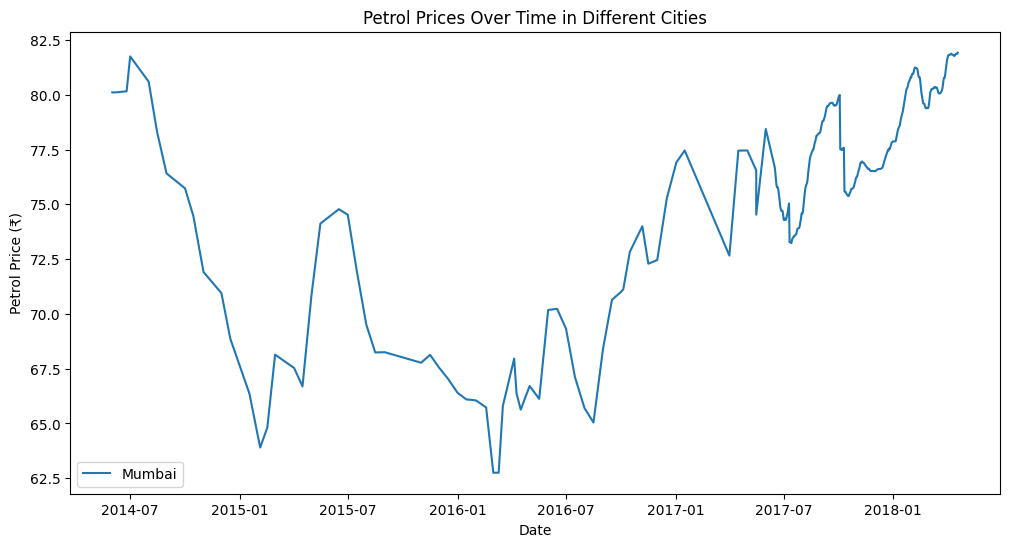

In [12]:
plt.figure(figsize=(12,6))

plt.plot(data["Date"], data["Mumbai"], label="Mumbai")

plt.xlabel("Date")
plt.ylabel("Petrol Price (₹)")
plt.title("Petrol Prices Over Time in Different Cities")
plt.legend()
plt.show()

In [13]:
# Drop duplicate columns
data = data.loc[:, ~data.columns.duplicated()]

# Convert Date to datetime
data["Date"] = pd.to_datetime(data["Date"])

print(data.columns)

Index(['Date', 'Delhi', 'Kolkata', 'Mumbai', 'Chennai'], dtype='object')


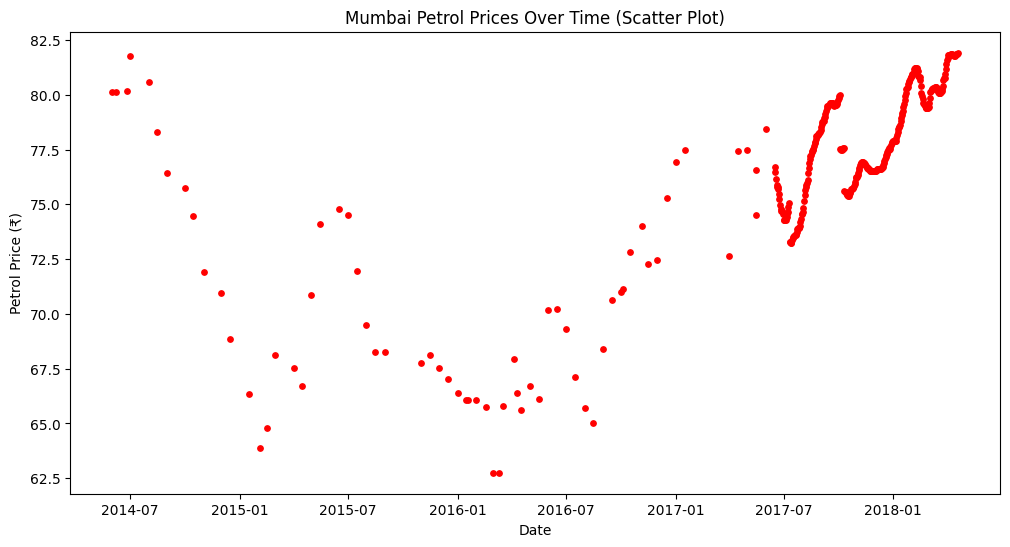

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(data["Date"], data["Mumbai"], color="red", s=15)
plt.xlabel("Date")
plt.ylabel("Petrol Price (₹)")
plt.title("Mumbai Petrol Prices Over Time (Scatter Plot)")
plt.show()


In [15]:
# Create lag feature (previous day's price)
data["Prev_Mumbai"] = data["Mumbai"].shift(1)

# Drop missing values (first row will have NaN)
df = data[["Date", "Mumbai", "Prev_Mumbai"]].dropna()


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Features and target
X = df[["Prev_Mumbai"]]
y = df["Mumbai"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
try:
    rmse = mean_squared_error(y_test, y_pred, squared=False)
except TypeError:
    rmse = mean_squared_error(y_test, y_pred) ** 0.5

r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score (Accuracy): {r2*100:.2f}%")

MAE: 0.17
RMSE: 0.19
R² Score (Accuracy): 94.35%


In [27]:
import pandas as pd


# Get the last available price
last_price = df["Mumbai"].iloc[-1]

# Create input DataFrame with the required column name
next_day_input = pd.DataFrame([[last_price]], columns=["Prev_Mumbai"])

# Predict next day's price
next_day_pred = model.predict(next_day_input)
price_value = next_day_pred[0]

# Print the result only
print("=======================================")
print("  Predicted Petrol Price in Mumbai:  ")
print(f"         ₹{price_value:.2f}         ")
print("=======================================")


  Predicted Petrol Price in Mumbai:  
         ₹81.74         
